<a href="https://colab.research.google.com/github/hyejinbeck/Seoul_hotplot/blob/main/K_Means_19%EC%B0%A8_8%EA%B0%9C%EA%B5%AC_%EC%97%85%EC%A2%85%EB%B3%84_%EB%A7%A4%EC%B6%9C%EA%B8%88%EC%95%A1%26%EA%B1%B4%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 환경설정

In [ ]:
############################################

# OS환경 : Mac OS
# 구글 코랩으로 작성

############################################ 초기셋팅
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import platform
import matplotlib

import warnings
warnings.filterwarnings('ignore')

# 여기서 Matplotlib 코드를 사용하여 그래프 생성 및 표시
%matplotlib inline
from google.colab import files
from google.colab import drive

In [ ]:
# 한글폰트
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
# plt.rc('font', family='NanumGothic')
# plt.rc('font', family='Malgun Gothic') #맑은 고딕으로 설정
# plt.rc('font', family='AppleGothic') #맥
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False  # 부호

Text(0.5, 0, '시간(분)')

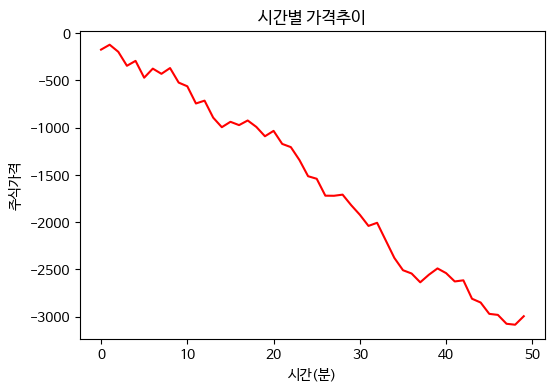

In [ ]:
#################### 한글폰트 깨지는지 확인
test_data = np.random.randint(-200, 100, 50).cumsum()
plt.figure(figsize=(6,4))
plt.plot(range(50), test_data, 'r')
plt.title('시간별 가격추이')
plt.ylabel('주식가격')
plt.xlabel('시간(분)')

#################### 그래도 에러나면 Runtime > Restart runtime 꼭 누르기!

In [ ]:
############################################ 불러오기
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

############################################ 원본 데이터
# df_real = pd.read_csv('/content/drive/MyDrive/2조_프로젝트/서울시 상권분석서비스(상권-추정매출).csv', encoding='euc_kr')

# df = pd.read_csv('/content/drive/MyDrive/2조_프로젝트/output5.csv', encoding='utf-8')
df = pd.read_csv('/content/drive/MyDrive/2조_프로젝트/output5.csv', encoding='euc_kr')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.shape

(163542, 82)

In [ ]:
df.isna().sum()

자치구                0
행정동                0
기준_년_코드            0
기준_분기_코드           0
상권_구분_코드           0
                  ..
연령대_30_매출_건수       0
연령대_40_매출_건수       0
연령대_50_매출_건수       0
연령대_60_이상_매출_건수    0
점포수                0
Length: 82, dtype: int64

In [ ]:
df.columns

Index(['자치구', '행정동', '기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드',
       '상권_코드_명', '서비스_업종_코드', '서비스_업종_코드_명', '분기당_매출_금액', '분기당_매출_건수',
       '주중_매출_비율', '주말_매출_비율', '월요일_매출_비율', '화요일_매출_비율', '수요일_매출_비율',
       '목요일_매출_비율', '금요일_매출_비율', '토요일_매출_비율', '일요일_매출_비율', '시간대_00~06_매출_비율',
       '시간대_06~11_매출_비율', '시간대_11~14_매출_비율', '시간대_14~17_매출_비율',
       '시간대_17~21_매출_비율', '시간대_21~24_매출_비율', '남성_매출_비율', '여성_매출_비율',
       '연령대_10_매출_비율', '연령대_20_매출_비율', '연령대_30_매출_비율', '연령대_40_매출_비율',
       '연령대_50_매출_비율', '연령대_60_이상_매출_비율', '주중_매출_금액', '주말_매출_금액', '월요일_매출_금액',
       '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
       '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
       '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액',
       '여성_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
       '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', '주중_매출_건수',
       '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수'

In [ ]:
df['서비스_업종_코드_명'].unique()

array(['한식음식점', '일식음식점', '섬유제품', '화초', '애완동물', '가구', '철물점', '조명용품', '제과점',
       '문구', '의약품', '반찬가게', '편의점', '노래방', '미용실', '당구장', '예술학원', '일반교습학원',
       '운동/경기용품', '패스트푸드점', '분식전문점', '호프-간이주점', '육류판매', '핸드폰',
       '컴퓨터및주변장치판매', '슈퍼마켓', '여관', '세탁소', '피부관리실', '네일숍', '자동차미용',
       '자동차수리', '스포츠클럽', '한의원', '치과의원', '일반의원', '스포츠 강습', '커피-음료', '일반의류',
       '치킨전문점', '전자상거래업', '중식음식점', '양식음식점', '골프연습장', 'PC방', '인테리어',
       '시계및귀금속', '미곡판매', '외국어학원', '신발', '가전제품수리', '화장품', '안경', '의료기기',
       '완구', '자전거 및 기타운송장비', '서적', '부동산중개업', '청과상', '수산물판매', '고시원',
       '가전제품', '가방'], dtype=object)

[블로그참고](https://velog.io/@nayoung5859/K-means-clustering%EC%9C%BC%EB%A1%9C-%EB%B2%88%ED%99%94%EA%B0%80-%EC%83%81%EA%B6%8C-%EC%B0%BE%EC%95%84%EB%B3%B4%EA%B8%B0)

In [ ]:
# 행정동,자치구 컬럼에 있는 "띄어쓰기" 없애기
df['행정동'] = df['행정동'].str.replace(' ', '')
df['자치구'] = df['자치구'].str.replace(' ', '')
df['서비스_업종_코드_명'] = df['서비스_업종_코드_명'].str.replace(' ', '')

# 전처리

해야할일 :
1. 업종변경
2. 상세업종변경
3. ~컬럼변경~
4. ~컬럼변경하고 데이터값 제한~
5. 라벨링


In [ ]:
###### 업종별로 4그룹 나누기
df_test = df[df['서비스_업종_코드_명'].isin(['치과의원', '일반의원', '한의원','피부관리실', '네일숍', '미용실'])]
# df_test = df[df['서비스_업종_코드_명'].isin(['가방', '일반의류', '슈퍼마켓', '반찬가게', '편의점', '세탁소'])]
# df_test = df[df['서비스_업종_코드_명'].isin(['분식전문점', '패스트푸드점', '양식음식점', '일식음식점', '중식음식점', '한식음식점', '치킨전문점', '호프-간이주점'])]
# df_test = df[df['서비스_업종_코드_명'].isin(['커피-음료', '제과점'])]
# df_test = df[df['서비스_업종_코드_명'].isin(['외국어학원', '일반교습학원', '예술학원'])]
# df_test = df[df['서비스_업종_코드_명'].isin(['스포츠클럽', '스포츠강습', '골프연습장', '당구장', 'PC방','노래방'])]

In [ ]:
df_test.shape      # 의료/미용 (22249, 82)
df_test.shape      # 생활/잡화 (22657, 82)
df_test.shape      # 음식점    (33732, 82)
df_test.shape      # 카페/음료  (9346, 82)
df_test.shape      # 교육      (8431, 82)
df_test.shape      # 레저/오락  (12615, 82)

(9346, 82)

In [ ]:
test_columns = [
    '자치구','분기당_매출_금액', '분기당_매출_건수','서비스_업종_코드_명'
]

df_test = df_test[test_columns]
df_test.shape

(9346, 4)

In [ ]:
########################### 여기에서 라벨링 필요한 컬럼만 발췌
def extract_non_numeric_columns(data_frame):
    non_numeric_columns = data_frame.select_dtypes(exclude=['number'])
    non_numeric_column_names = non_numeric_columns.columns.tolist()
    return non_numeric_column_names

######### 수치형 아닌 컬럼만 발췌
for_labeling_columns = extract_non_numeric_columns(df_test)
for_labeling_columns         # []는 문자열데이터가 없어서, 인코딩 할 필요가 없음

['자치구', '서비스_업종_코드_명']

In [ ]:
service_mapping = {         # 의료/미용
    '치과의원' : 0,
    '일반의원' : 1,
    '한의원' : 2,
    '피부관리실' : 3,
    '네일숍' : 4,
    '미용실' : 5
}
# service_mapping = {        # 생활/잡화
#     '가방': 0,
#     '일반의류' : 1,
#     '슈퍼마켓' : 2,
#     '반찬가게' : 3,
#     '편의점' : 4,
#     '세탁소' : 5
# }
# service_mapping = {        # 음식점
#     '분식전문점' : 0,
#     '패스트푸드점' : 1,
#     '양식음식점' : 2,
#     '일식음식점' : 3,
#     '중식음식점' : 4,
#     '한식음식점' : 5,
#     '치킨전문점' : 6,
#     '호프-간이주점' : 7
# }
# service_mapping = {        # 카페/음료
#     '커피-음료':0,
#     '제과점':1
# }
# service_mapping = {        # 교육
#     '외국어학원' : 0,
#     '일반교습학원' : 1,
#     '예술학원' : 2
# # }
# service_mapping = {        # 레저/오락
#     '스포츠클럽': 0,
#     '스포츠강습' : 1,
#     '골프연습장' : 2,
#     '당구장' : 3,
#     'PC방' : 4,
#     '노래방' : 5
# }
df_test['서비스_업종_코드_명'] = df_test['서비스_업종_코드_명'].map(service_mapping)
df_test.shape

(9346, 4)

In [ ]:
df_test.head(2)

,자치구,분기당_매출_금액,분기당_매출_건수,서비스_업종_코드_명
10,중랑구,309638589.0,30228,1
45,중랑구,113793307.0,24953,0


In [ ]:
df_test['자치구'].unique()

array(['중랑구', '성동구', '용산구', '광진구', '중구', '동대문구', '성북구', '종로구', '강북구',
       '도봉구', '강동구', '강서구', '구로구', '양천구', '관악구', '서초구', '동작구', '영등포구',
       '금천구', '노원구', '은평구', '마포구', '서대문구', '송파구', '강남구'], dtype=object)

In [ ]:
df_test['자치구'].unique()

df_gu = df_test[df_test['자치구'].isin([
    '강남구','송파구','서초구',
    '영등포구','중구',
    '관악구','강동구','노원구'])]
df_gu.shape

(3415, 4)

In [ ]:
gu_mapping = {
    '강남구': 0,
    '송파구': 1,
    '서초구': 2,
    '영등포구': 3,
    '중구': 4,
    '관악구': 5,
    '강동구': 6,
    '노원구': 7
}

df_gu['자치구'] = df_gu['자치구'].map(gu_mapping)
df_gu.shape

(3415, 4)

In [ ]:
df_gu.head()

,자치구,분기당_매출_금액,분기당_매출_건수,서비스_업종_코드_명
1005,4,5.706659e+08,86728,0
1025,4,1.825709e+09,183701,1
1104,4,7.317952e+08,110965,0
1121,4,3.822382e+08,38827,1
1522,4,7.482750e+08,74620,1


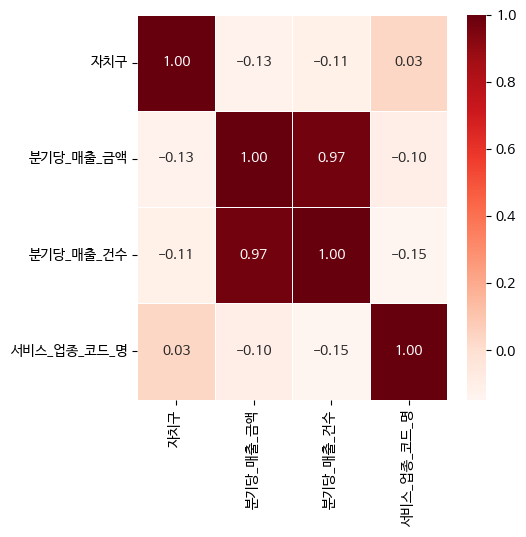

In [ ]:
df_gu_corr = df_gu.corr()

plt.figure(figsize=(5,5))
sns.heatmap(data = df_gu_corr, annot=True, fmt = '.2f', linewidths=.5, cmap='Reds')
plt.show()

# 스케일링

1. ~위에 컬럼변경시, 스케일링 제외대상~

In [ ]:
df_gu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3415 entries, 1005 to 163245
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   자치구          3415 non-null   int64  
 1   분기당_매출_금액    3415 non-null   float64
 2   분기당_매출_건수    3415 non-null   int64  
 3   서비스_업종_코드_명  3415 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 133.4 KB


In [ ]:
df_gu['자치구'].unique() # array([4, 6, 5, 2, 3, 7, 1, 0])

########## 자치구는 스케일링 제외하고싶음

array([4, 6, 5, 2, 3, 7, 1, 0])

In [ ]:
# NaN값 찾기
df_gu[df_gu.isnull().any(axis=1)]    # 없음

,자치구,분기당_매출_금액,분기당_매출_건수,서비스_업종_코드_명


In [ ]:
from sklearn.preprocessing import StandardScaler

# 스케일링 제외할 컬럼 따로
# gu_column = df_gu['자치구']
gu_column = df_gu[['자치구','서비스_업종_코드_명']]

# StandardScaler 적용
scaler = StandardScaler()

# '자치구' 열을 제외한 데이터프레임
df_gu_features = df_gu.drop(columns=['자치구'])

# 스케일링 적용
df_gu_scaled_data = scaler.fit_transform(df_gu_features)

# 데이터프레임 형태로 변환
df_gu_scaled_data = pd.DataFrame(df_gu_scaled_data, columns=df_gu_features.columns)

# 스케일링 제외했던 열 추가할 때, 인덱스를 재설정하여 정확한 값으로 추가
df_gu_scaled_data[['자치구','서비스_업종_코드_명']] = gu_column.values

# 인덱스를 리셋
# 스케일링 전의 '자치구' 열과 스케일링 후에 추가한 '자치구' 열의 인덱스가 동일하게 설정
df_gu_scaled_data.reset_index(drop=True, inplace=True)  # 데이터프레임의 인덱스를 재설정

df_gu_scaled_data

##########################에러날경우 다시 runtime

,분기당_매출_금액,분기당_매출_건수,서비스_업종_코드_명,자치구
0,-0.090955,0.015702,0,4
1,0.678362,0.524807,1,4
2,0.007814,0.142945,0,4
3,-0.206457,-0.235777,1,4
4,0.017916,-0.047865,1,4
...,...,...,...,...
3410,0.290525,0.282248,0,3
3411,-0.352133,-0.291763,0,3
3412,-0.224891,-0.259958,1,3
3413,-0.436892,-0.433895,0,3


In [ ]:
# NaN값 찾기
df_gu_scaled_data[df_gu_scaled_data.isnull().any(axis=1)]    # 없음

,분기당_매출_금액,분기당_매출_건수,서비스_업종_코드_명,자치구


In [ ]:
df_gu_scaled_data.head()

,분기당_매출_금액,분기당_매출_건수,서비스_업종_코드_명,자치구
0,-0.090955,0.015702,0,4
1,0.678362,0.524807,1,4
2,0.007814,0.142945,0,4
3,-0.206457,-0.235777,1,4
4,0.017916,-0.047865,1,4


In [ ]:
df_gu_scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3415 entries, 0 to 3414
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   분기당_매출_금액    3415 non-null   float64
 1   분기당_매출_건수    3415 non-null   float64
 2   서비스_업종_코드_명  3415 non-null   int64  
 3   자치구          3415 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 106.8 KB


# 자치구 분포도

1. ~위에 컬럼 변경시, X축과 Y축 분포도에 들어갈 컬럼 변경~
2. ~이상치 제거없이 그대로 할경우~

In [ ]:
df_gu_scaled_data.columns

Index(['분기당_매출_금액', '분기당_매출_건수', '서비스_업종_코드_명', '자치구'], dtype='object')

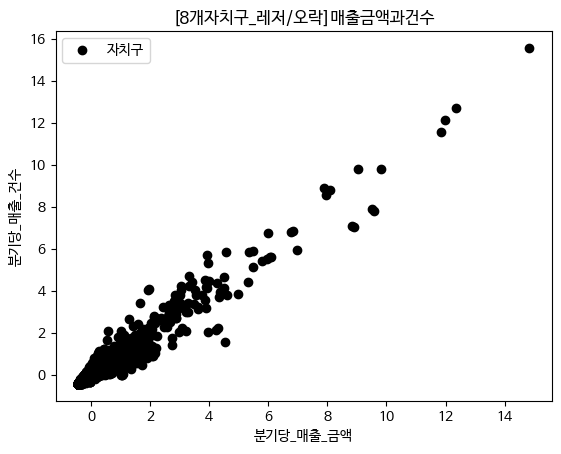

In [ ]:
# 자치구를 기준으로 데이터 포인트 (분포도) 파악하기

X_columns = ['분기당_매출_금액']
Y_columns = ['분기당_매출_건수']


X = df_gu_scaled_data[X_columns]
Y = df_gu_scaled_data[Y_columns]


plt.scatter(X, Y, c='black', label='자치구')
plt.xlabel('분기당_매출_금액')
plt.ylabel('분기당_매출_건수')
plt.legend()
plt.title('[8개자치구_레저/오락]매출금액과건수')
plt.show()

In [ ]:
# ######## 이상치 제거 안한 값으로 하는경우

# df_cleaned = df_gu_scaled_data

In [ ]:
####### 이상치 제거값으로 하는경우

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 식별
outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)

# 이상치 제거
df_cleaned = df_gu_scaled_data[~outliers]

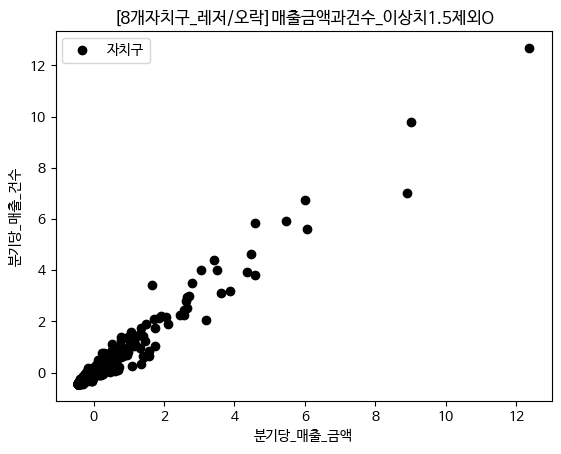

In [ ]:
X = df_cleaned[X_columns]
Y = df_cleaned[Y_columns]

plt.scatter(X, Y, c='black', label='자치구')
plt.xlabel('분기당_매출_금액')
plt.ylabel('분기당_매출_건수')
plt.legend()
plt.title('[8개자치구_레저/오락]매출금액과건수_이상치1.5제외O')
plt.show()

In [ ]:
df_cleaned.shape               # (1779, 3) rows갯수, columns 갯수
df_cleaned.shape[0]            # 위의 데이터 포인트(점)의 총 갯수를 나타냄

748

In [ ]:
df_cleaned.head(3)

,분기당_매출_금액,분기당_매출_건수,서비스_업종_코드_명,자치구
1,0.678362,0.524807,1,4
4,0.017916,-0.047865,1,4
5,2.646253,2.961606,0,4


# k값 정하기

<Axes: >

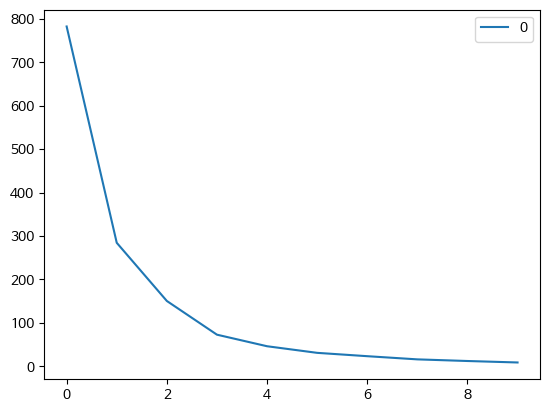

In [ ]:
from sklearn.cluster import KMeans

inertia = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k).fit(X)
    value = kmeans.inertia_
    inertia.append(value)

pd.DataFrame(inertia).plot()

# k-means

1. n_cluster 갯수 변경



In [ ]:
# - n_clusters : 군집 중심점(centroid)의 개수를 지정(군집의 개수를 지정)
# - max_iter : centroid가 움직이는 과정의 최대 횟수

# k-Means 모델 생성
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)

# 저차원 데이터에 k-Means 모델을 적용하여 클러스터링
cluster_labels = kmeans.fit_predict(df_cleaned)
X = df_cleaned

############################## 학습
kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

In [ ]:
############################## 클러스터 번호 확인
cluster_labels = kmeans.fit_predict(X)
cluster_labels

array([3, 3, 2, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 3, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       3, 1, 0, 0, 3, 3, 0, 1, 0, 1, 1, 3, 1, 3, 0, 3, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 0, 3, 3, 1,
       3, 3, 3, 3, 1, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3,
       0, 1, 3, 3, 2, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 1, 3, 0, 3, 3, 3,
       3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 0,

In [ ]:
df_cleaned['cluster_id'] = kmeans.labels_
df_cleaned['cluster_id'].value_counts()

3    269
1    229
0    221
2     29
Name: cluster_id, dtype: int64

In [ ]:
# 해당 인덱스의 cluster_id 찾기

df_cleaned.head(10)

,분기당_매출_금액,분기당_매출_건수,서비스_업종_코드_명,자치구,cluster_id
1,0.678362,0.524807,1,4,3
4,0.017916,-0.047865,1,4,3
5,2.646253,2.961606,0,4,2
11,-0.109275,-0.152696,0,6,1
12,-0.425115,-0.420014,0,6,1
13,-0.381598,-0.376150,0,6,1
17,-0.418551,-0.431737,1,4,3
36,0.788492,1.379901,0,4,3
37,-0.392318,-0.390703,1,4,3
50,-0.417522,-0.406049,0,4,3


In [ ]:
# 해당 인덱스의 cluster_id 찾기

row_index = 50
cluster_id = df_cleaned.loc[row_index, 'cluster_id']
print(f'인덱스 {row_index} 번의 cluster 번호는 {cluster_id} 입니다.')

인덱스 50 번의 cluster 번호는 3 입니다.


In [ ]:
# fit_predict : 훈련과 동시에 예측
kmeans.fit_predict(X)

array([0, 0, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 2, 0, 1, 2, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       0, 1, 2, 2, 0, 0, 2, 1, 2, 1, 1, 0, 1, 0, 2, 0, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 1, 0, 0, 3, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 2, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2,

In [ ]:
# 타겟과 클러스터 내의 데이터 포인트 개수를 각각 확인 (한번만 테스트해도됨)
X.groupby(['자치구', 'cluster_id'])['분기당_매출_금액'].count().to_frame()

분기당_매출_금액
자치구 cluster_id           
0   0                 121
    2                   7
1   0                 100
    2                   3
2   2                   6
    3                  98
3   2                   5
    3                  94
4   2                   6
    3                  77
5   1                  76
    2                   1
6   1                  83
7   1                  70
    2                   1

# PCA 차원축소

In [ ]:
# PCA를 이용해 차원 축소
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(X)

X['pca_1'] = pca_transformed[:, 0]
X['pca_2'] = pca_transformed[:, 1]

X.head()

,분기당_매출_금액,분기당_매출_건수,서비스_업종_코드_명,자치구,cluster_id,pca_1,pca_2
1,0.678362,0.524807,1,4,3,-1.023416,1.261578
4,0.017916,-0.047865,1,4,3,-1.130158,0.426280
5,2.646253,2.961606,0,4,2,-0.475212,4.034152
11,-0.109275,-0.152696,0,6,1,-2.787459,-0.059962
12,-0.425115,-0.420014,0,6,1,-2.837953,-0.454941


In [ ]:
X.shape

(748, 7)

# 시각화

1. ~위에 X축, Y축 변경 있을 경우~
2. ~주요컬럼 변경시, hue 값~
3. title 제목 변경

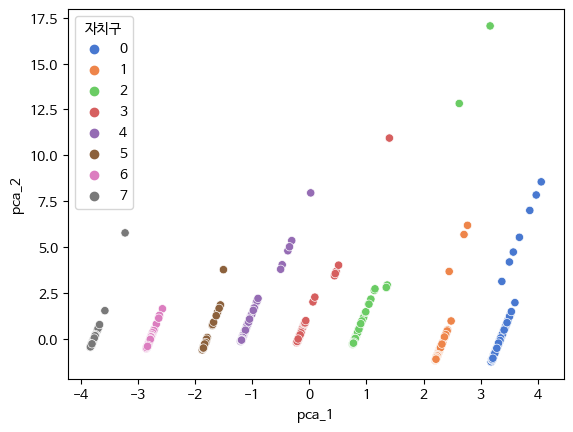

In [ ]:
import seaborn as sns

sns.scatterplot(
    x='pca_1',
    y='pca_2',
    hue='자치구',
    palette='muted',
    data= X
)

plt.show()

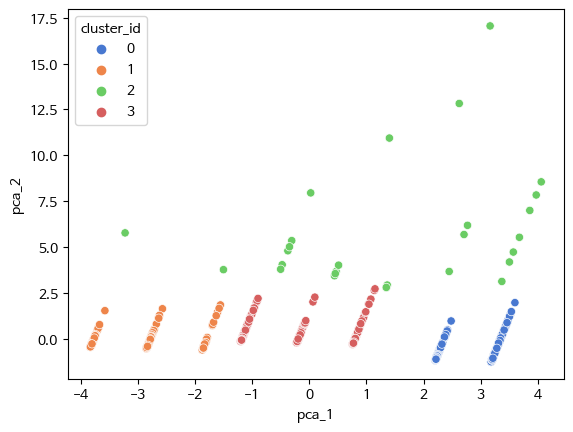

In [ ]:
import seaborn as sns

sns.scatterplot(
    x='pca_1',
    y='pca_2',
    hue='cluster_id',
    palette='muted',
    data= X
)

plt.show()

In [ ]:
# import seaborn as sns

# sns.scatterplot(
#     x='pca_1',
#     y='pca_2',
#     hue='분기당_매출_금액',
#     palette='muted',
#     data= X
# )

# plt.show()
################ 분기당_매출_금액 수가 워낙 많아 X

In [ ]:
centers = kmeans.cluster_centers_
centers

array([[-1.50121951e-01, -1.63833643e-01,  3.49442379e-01,
         2.92193309e+00,  3.00000000e+00],
       [-2.52485964e-01, -2.26119967e-01,  4.14847162e-01,
         5.97379913e+00,  1.00000000e+00],
       [-8.97439390e-02, -9.57432821e-02,  3.61990950e-01,
         4.52488688e-01, -3.33066907e-15],
       [ 4.03950662e+00,  4.15040335e+00,  1.11022302e-16,
         2.27586207e+00,  2.00000000e+00]])

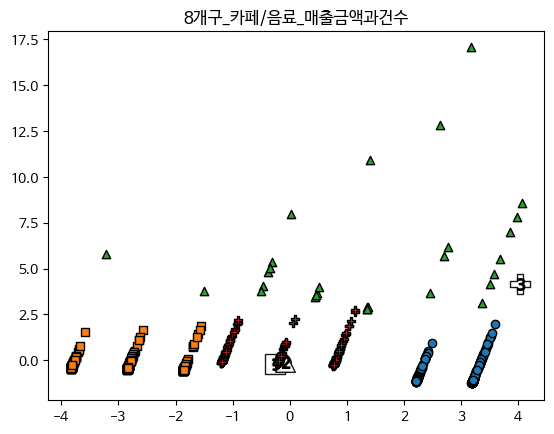

In [ ]:
# 클러스터 번호 가져오기
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label의 종류 별로 반복문을 돌려가면서 Scatter를 찍기
for label in unique_labels:
  # 각 레이블에 대한 클러스터 정보
  label_cluster = X[X['cluster_id'] == label]

  plt.scatter(
      x=label_cluster['pca_1'],
      y=label_cluster['pca_2'],
      edgecolor='k',
      marker=markers[label]
  )

  # 각 군집의 centroid 구하기
  center_x_y = centers[label]

  plt.scatter(
      x=center_x_y[0],
      y=center_x_y[1],
      s=200,
      color='white', alpha=0.9, edgecolor='k', marker=markers[label]
  )

  plt.scatter(
      x=center_x_y[0],
      y=center_x_y[1],
      s=70,
      color='k', edgecolor='k', marker='$%d$' % label
  )

plt.title('8개구_카페/음료_매출금액과건수')
plt.show()

In [ ]:
X.head(2)

,분기당_매출_금액,분기당_매출_건수,서비스_업종_코드_명,자치구,cluster_id,pca_1,pca_2
1,0.678362,0.524807,1,4,3,-1.023416,1.261578
4,0.017916,-0.047865,1,4,3,-1.130158,0.426280


# 해석하기

1. ~주 타겟 컬럼명 변경 있을경우~
2. ~위에 스케일링 제외대상 and 라벨링 진행한 컬럼 있을경우~

In [ ]:
# label에 따라 DataFrame을 그룹화
grouped = X.groupby('cluster_id')
grouped

In [ ]:
X.head(2)

,분기당_매출_금액,분기당_매출_건수,서비스_업종_코드_명,자치구,cluster_id,pca_1,pca_2
1,0.678362,0.524807,1,4,3,-1.023416,1.261578
4,0.017916,-0.047865,1,4,3,-1.130158,0.426280


In [ ]:
# 각 그룹에서 자치구 변수의 분포를 확인
for label, group in grouped:
    print(f"Label: {label}")
    print(group['자치구'].value_counts())
    print()
################## 클러스터별로 왜 이 자치구들이 모여있는지 특성 파악 (클러스터수 조절가능)
#각 자치구가 해당 클러스터에 얼마나 많이 속하는지를 나타냅니다.

Label: 0
0    121
1    100
Name: 자치구, dtype: int64

Label: 1
6    83
5    76
7    70
Name: 자치구, dtype: int64

Label: 2
0    7
4    6
2    6
3    5
1    3
7    1
5    1
Name: 자치구, dtype: int64

Label: 3
2    98
3    94
4    77
Name: 자치구, dtype: int64



In [ ]:
X.head(2)

,분기당_매출_금액,분기당_매출_건수,서비스_업종_코드_명,자치구,cluster_id,pca_1,pca_2
1,0.678362,0.524807,1,4,3,-1.023416,1.261578
4,0.017916,-0.047865,1,4,3,-1.130158,0.426280


# 좀 더 편하게 결과 해설
1. 상세업종 수정

In [ ]:
gu_mapping_back = {
    0: '강남구',
    1: '송파구',
    2: '서초구',
    3: '영등포구',
    4: '중구',
    5: '관악구',
    6: '강동구',
    7: '노원구',
}

X['자치구'] = X['자치구'].map(gu_mapping_back)
X.shape

(748, 7)

In [ ]:
# service_mapping_back = {        # 의료/미용
#     0: '치과의원' ,
#     1: '일반의원' ,
#     2: '한의원' ,
#     3: '피부관리실' ,
#     4: '네일숍' ,
#     5: '미용실'
# }
# service_mapping_back = {       # 생활/잡화
#     0:'가방',
#     1:'일반의류' ,
#     2:'슈퍼마켓' ,
#     3:'반찬가게' ,
#     4:'편의점' ,
#     5:'세탁소' ,
# }
# service_mapping_back = {        # 음식점
#     0:'분식전문점' ,
#     1:'패스트푸드점' ,
#     2:'양식음식점'  ,
#     3:'일식음식점'  ,
#     4:'중식음식점'  ,
#     5:'한식음식점'  ,
#     6:'치킨전문점'  ,
#     7:'호프-간이주점'
# }
service_mapping_back = {        # 카페/음료
    0:'커피-음료',
    1:'제과점'
}
# service_mapping_back = {        # 교육
#     0:'외국어학원',
#     1:'일반교습학원' ,
#     2:'예술학원' ,
# }
# service_mapping_back = {       # 레저/오락
#     0:'스포츠클럽',
#     1:'스포츠강습' ,
#     2:'골프연습장' ,
#     3:'당구장' ,
#     4:'PC방' ,
#     5:'노래방' ,
# }
X['서비스_업종_코드_명'] = X['서비스_업종_코드_명'].map(service_mapping_back)
X.shape

(748, 7)

In [ ]:
X.head(2)

,분기당_매출_금액,분기당_매출_건수,서비스_업종_코드_명,자치구,cluster_id,pca_1,pca_2
1,0.678362,0.524807,제과점,중구,3,-1.023416,1.261578
4,0.017916,-0.047865,제과점,중구,3,-1.130158,0.426280


In [ ]:
# 각 그룹에서 자치구 변수의 분포를 확인
for id, group in grouped:
    print(f"cluster_id : {id} 인 자치구")
    print(group['자치구'].value_counts())
    print()
################## 클러스터별로 왜 이 자치구들이 모여있는지 특성 파악 (클러스터수 조절가능)
#각 자치구가 해당 클러스터에 얼마나 많이 속하는지를 나타냅니다.

cluster_id : 0 인 자치구
강남구    121
송파구    100
Name: 자치구, dtype: int64

cluster_id : 1 인 자치구
강동구    83
관악구    76
노원구    70
Name: 자치구, dtype: int64

cluster_id : 2 인 자치구
강남구     7
중구      6
서초구     6
영등포구    5
송파구     3
노원구     1
관악구     1
Name: 자치구, dtype: int64

cluster_id : 3 인 자치구
서초구     98
영등포구    94
중구      77
Name: 자치구, dtype: int64



In [ ]:
X_0 = X[X['cluster_id']==0]
X_1 = X[X['cluster_id']==1]
X_2 = X[X['cluster_id']==2]

In [ ]:
gu0 = X_0[X_0['자치구']=='중구']
gu0['서비스_업종_코드_명'].unique()

array([], dtype=object)

In [ ]:
gu1 = X_1[X_1['자치구']=='중구']
gu1['서비스_업종_코드_명'].unique()

array([], dtype=object)

In [ ]:
gu2 = X_2[X_2['자치구']=='중구']
gu2['서비스_업종_코드_명'].unique()

array(['커피-음료'], dtype=object)

In [ ]:
# 클러스터 번호 {cluster_id}의 {해당되는 자치구별로} 의 서비스_업종_코드_명은 {해당 cluster_id의 자치구에 해당되는 서비스_업종_코드_명.unique} 입니다.

In [ ]:
# # 클러스터별로 자치구와 서비스 업종 코드 명 출력
# for cluster_id in range(3):
#     cluster_data = X[X['cluster_id'] == cluster_id]

#     for gu_name, gu_group in cluster_data.groupby('자치구'):
#         service_unique = gu_group['서비스_업종_코드_명'].unique()
#         print(f"{cluster_id}의 자치구 \n{gu_name} 상세업종: {','.join(service_unique)}")


In [ ]:
# # 클러스터별로 자치구와 서비스 업종 코드 명 출력
# for cluster_id in range(3):
#     print(f"Cluster {cluster_id}의 자치구 및 상세업종:")
#     cluster_data = X[X['cluster_id'] == cluster_id]

#     for gu_name, gu_group in cluster_data.groupby('자치구'):
#         service_unique = gu_group['서비스_업종_코드_명'].unique()
#         print(f"{gu_name} - {' ,'.join(service_unique)}")
#     print()

# 결과

In [ ]:
# 클러스터별로 자치구와 서비스 업종 코드 명 출력
for cluster_id in range(5):
    print(f"Cluster {cluster_id}")
    cluster_data = X[X['cluster_id'] == cluster_id]

    for gu_name, gu_group in cluster_data.groupby('자치구'):
        service_unique = gu_group['서비스_업종_코드_명'].unique()
        # 상세업종을 원하는 순서대로 정렬
        #sorted_service = ['치과의원', '일반의원', '한의원','피부관리실', '네일숍', '미용실']      # 의료/미용
        #sorted_service = ['가방', '일반의류', '슈퍼마켓', '반찬가게', '편의점', '세탁소']      # 생활/잡화
        #sorted_service = ['분식전문점', '패스트푸드점', '양식음식점', '일식음식점', '중식음식점', '한식음식점', '치킨전문점', '호프-간이주점']   # 음식점
        sorted_service = ['커피-음료','제과점']    # 카페/음료
        #sorted_service = ['외국어학원','일반교습학원','예술학원']    # 교육
        #sorted_service = ['스포츠클럽', '스포츠강습', '골프연습장', '당구장', 'PC방','노래방'] # 레저/오락

        sorted_service = [s for s in sorted_service if s in service_unique]
        print(f"{gu_name} - {' ,'.join(sorted_service)}")
    print()

Cluster 0
강남구 - 커피-음료 ,제과점
송파구 - 커피-음료 ,제과점

Cluster 1
강동구 - 커피-음료 ,제과점
관악구 - 커피-음료 ,제과점
노원구 - 커피-음료 ,제과점

Cluster 2
강남구 - 커피-음료
관악구 - 커피-음료
노원구 - 커피-음료
서초구 - 커피-음료
송파구 - 커피-음료
영등포구 - 커피-음료
중구 - 커피-음료

Cluster 3
서초구 - 커피-음료 ,제과점
영등포구 - 커피-음료 ,제과점
중구 - 커피-음료 ,제과점

Cluster 4

